In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score, log_loss
# sns.set(rc={'figure.figsize':(10,10)})

In [2]:
param_array = pd.read_csv("parameters/parameter_array.csv").set_index("PARAM")

In [3]:
param_array

,AIRPORTS,LOOKAHEAD,DATA,CONFIG_SUPPORT,EPOCHS,NUMBER_TRIALS,PATIENCE
PARAM,,,,,,,
1,katl,1,PD,0,1000,100,20
2,kclt,1,PD,0,1000,100,20
3,kden,1,PD,0,1000,100,20
4,kdfw,1,PD,0,1000,100,20
5,kjfk,1,PD,0,1000,100,20
...,...,...,...,...,...,...,...
716,kmem,12,PD_SM,1,1000,100,20
717,kmia,12,PD_SM,1,1000,100,20
718,kord,12,PD_SM,1,1000,100,20


In [4]:
Param_Nums = []
DFs = []

Not_Finishes = []
for param in param_array.index:
    
    try:
        df = pd.read_csv(f"Results/Result_{param}/results_df.csv")
        Param_Nums.append(param)
        DFs.append(df)
        
        
    except:
        
        Not_Finishes.append(param)

    
df = pd.concat(DFs)
df["PARAM"] = Param_Nums
df = pd.merge(df, param_array, on="PARAM")

In [5]:
np.unique(df.columns)

array(['AIRPORTS', 'CONFIG_SUPPORT', 'DATA', 'EPOCHS', 'LOOKAHEAD',
       'NUMBER_TRIALS', 'PARAM', 'PATIENCE', 'Unnamed: 0',
       'config_support', 'norm_support', 'param', 'test_accuracy',
       'test_f1', 'test_loss', 'train_accuracy', 'train_f1', 'train_loss',
       'val_accuracy', 'val_f1', 'val_loss'], dtype=object)

In [6]:
pd.set_option("display.max_rows", 500)
df.groupby(["CONFIG_SUPPORT","DATA"]).mean()["train_loss"]

CONFIG_SUPPORT  DATA 
0               PD       0.099857
                PD_SM    0.069716
                SM       0.064908
1               PD       0.083622
                PD_SM    0.061680
                SM       0.059259
Name: train_loss, dtype: float64

In [24]:
pd.set_option("display.max_rows", 500)
df.groupby(["CONFIG_SUPPORT","DATA"]).mean()["val_loss"]

CONFIG_SUPPORT  DATA 
0               PD       0.100115
                PD_SM    0.092132
                SM       0.092795
1               PD       0.081747
                PD_SM    0.078266
                SM       0.079607
Name: val_loss, dtype: float64

In [8]:
pd.set_option("display.max_rows", 500)
df.groupby(["AIRPORTS","DATA"]).mean()["test_loss"]

AIRPORTS  DATA 
katl      PD       0.062879
          PD_SM    0.063278
          SM       0.065152
kclt      PD       0.121937
          PD_SM    0.111599
          SM       0.113900
kden      PD       0.092520
          PD_SM    0.086892
          SM       0.085360
kdfw      PD       0.064605
          PD_SM    0.053584
          SM       0.053176
kjfk      PD       0.158346
          PD_SM    0.184190
          SM       0.190515
kmem      PD       0.109752
          PD_SM    0.106134
          SM       0.105519
kmia      PD       0.096593
          PD_SM    0.092859
          SM       0.094741
kord      PD       0.087871
          PD_SM    0.089179
          SM       0.089626
kphx      PD       0.092555
          PD_SM    0.084010
          SM       0.083683
ksea      PD       0.105418
          PD_SM    0.146369
          SM       0.144038
Name: test_loss, dtype: float64

<AxesSubplot:xlabel='LOOKAHEAD', ylabel='config_support'>

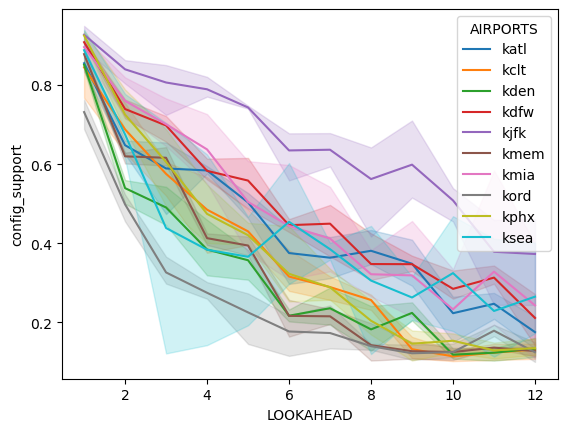

In [9]:
small_df = df[df.CONFIG_SUPPORT==1]
small_df.groupby(["AIRPORTS","LOOKAHEAD"]).mean()[["config_support","norm_support"]]

sns.lineplot(data=small_df,x="LOOKAHEAD",y="config_support",hue="AIRPORTS")

<AxesSubplot:xlabel='LOOKAHEAD', ylabel='norm_support'>

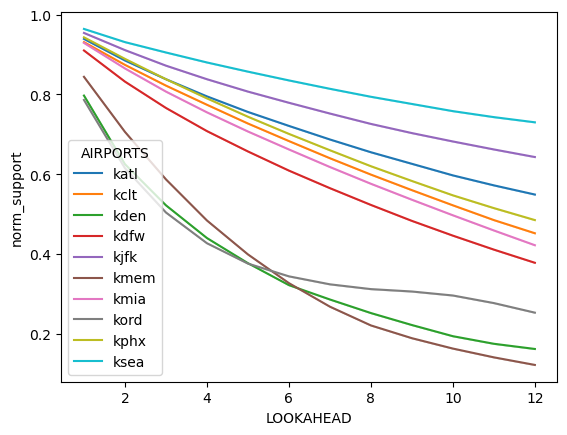

In [10]:
sns.lineplot(data=small_df,x="LOOKAHEAD",y="norm_support",hue="AIRPORTS")

## Methodolgy Comparison

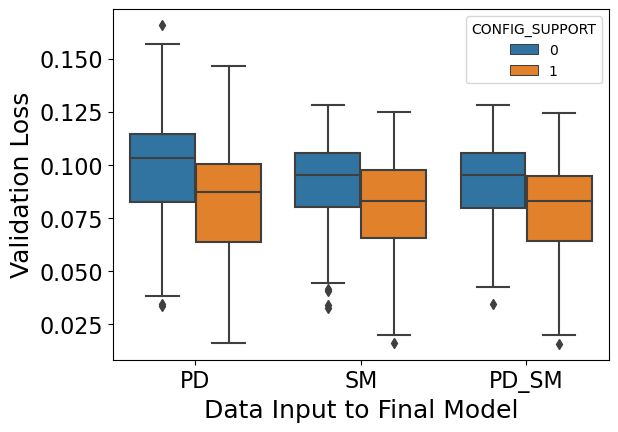

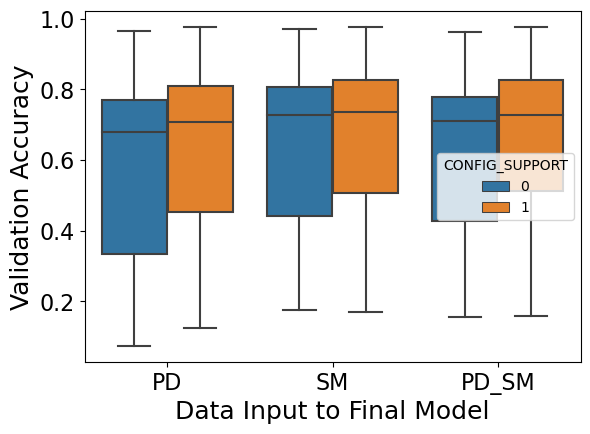

In [11]:
sns.boxplot(x="DATA", y="val_loss",
            hue="CONFIG_SUPPORT",
            data=df)
plt.xlabel("Data Input to Final Model", fontsize=18)
plt.ylabel("Validation Loss", fontsize=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('figures/Val_Loss_vs_Models.pdf')
plt.show()


sns.boxplot(x="DATA", y="val_accuracy",
            hue="CONFIG_SUPPORT",
            data=df)
plt.xlabel("Data Input to Final Model", fontsize=18)
plt.ylabel("Validation Accuracy", fontsize=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('figures/Val_Acc_vs_Models.pdf')
plt.show()


In [12]:
results_df_PD = results_df = df[(df.DATA == "PD")]
results_df_SM = results_df = df[(df.DATA == "SM")]
results_df_PD_SM = results_df = df[(df.DATA == "PD_SM")]

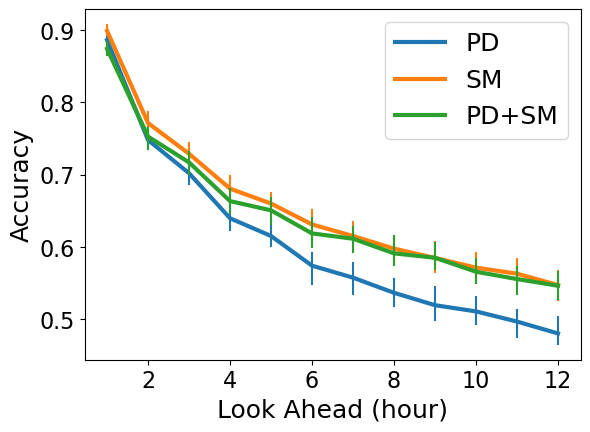

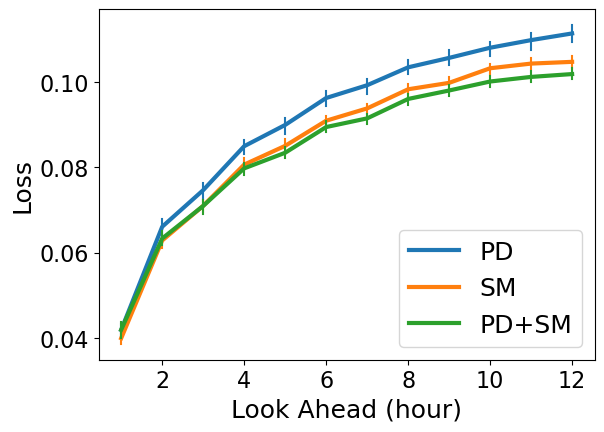

In [13]:
sns.lineplot(data=results_df_PD, x="LOOKAHEAD", y="val_accuracy", err_style="bars", ci=30, linewidth=3)
sns.lineplot(data=results_df_SM, x="LOOKAHEAD", y="val_accuracy", err_style="bars", ci=30, linewidth=3)
sns.lineplot(data=results_df_PD_SM, x="LOOKAHEAD", y="val_accuracy", err_style="bars", ci=30, linewidth=3)

plt.legend(["PD", "SM", "PD+SM"], fontsize=18)
plt.xlabel("Look Ahead (hour)", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('figures/Acc_Data_vs_Lookahead.pdf')
plt.show()


sns.lineplot(data=results_df_PD, x="LOOKAHEAD", y="val_loss", err_style="bars", ci=30, linewidth=3)
sns.lineplot(data=results_df_SM, x="LOOKAHEAD", y="val_loss", err_style="bars", ci=30, linewidth=3)
sns.lineplot(data=results_df_PD_SM, x="LOOKAHEAD", y="val_loss", err_style="bars", ci=30, linewidth=3)

plt.legend(["PD", "SM", "PD+SM"], fontsize=18)
plt.xlabel("Look Ahead (hour)", fontsize=18)
plt.ylabel("Loss", fontsize=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('figures/Loss_Data_vs_Lookahead.pdf')
plt.show()

In [14]:
results_df_config_support = results_df = df[(df.CONFIG_SUPPORT == 1)]
results_df_no_config_support = results_df = df[(df.CONFIG_SUPPORT == 0)]

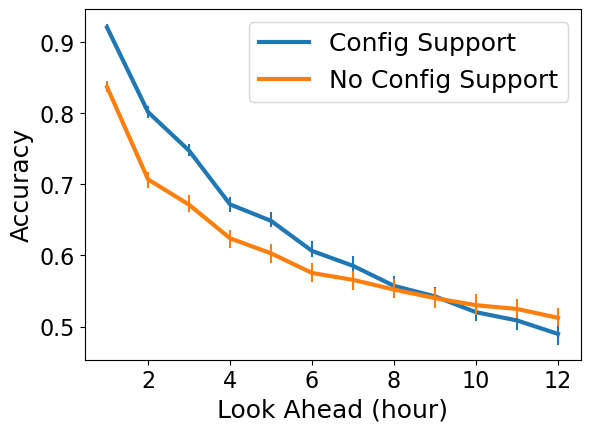

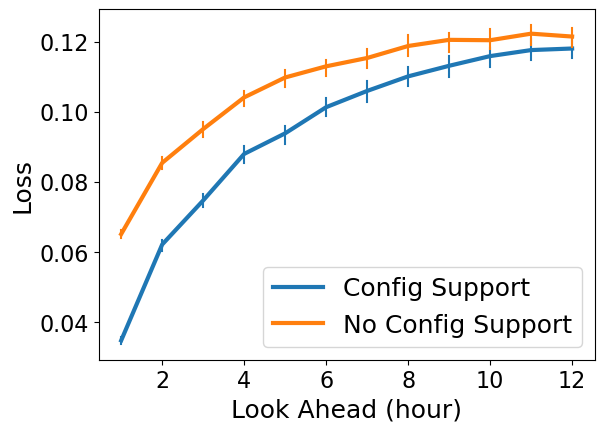

In [15]:
sns.lineplot(data=results_df_config_support, x="LOOKAHEAD", y="test_accuracy", err_style="bars", ci=30, linewidth=3)
sns.lineplot(data=results_df_no_config_support, x="LOOKAHEAD", y="test_accuracy", err_style="bars", ci=30, linewidth=3)

plt.legend(["Config Support", "No Config Support"], fontsize=18)
plt.xlabel("Look Ahead (hour)", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('figures/Accuracy_vs_Lookahead_Config_Support.pdf')
plt.show()

sns.lineplot(data=results_df_config_support, x="LOOKAHEAD", y="test_loss", err_style="bars", ci=30, linewidth=3)
sns.lineplot(data=results_df_no_config_support, x="LOOKAHEAD", y="test_loss", err_style="bars", ci=30, linewidth=3)

plt.legend(["Config Support", "No Config Support"], fontsize=18)
plt.xlabel("Look Ahead (hour)", fontsize=18)
plt.ylabel("Loss", fontsize=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('figures/Loss_vs_Lookahead_Config_Support.pdf')
plt.show()

## Best Config Results

In [16]:
results_df = df[(df.CONFIG_SUPPORT == 1) & (df.DATA == "PD_SM")]

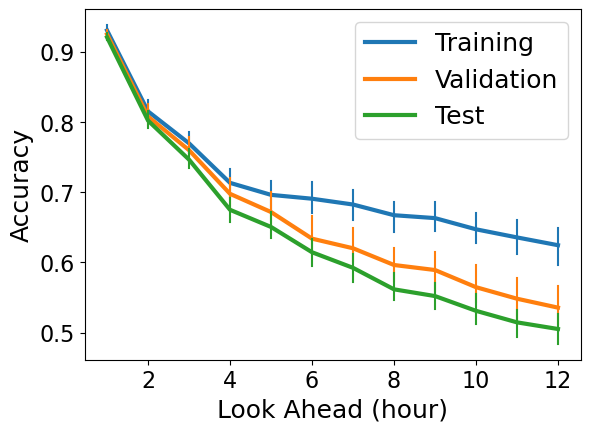

In [17]:
sns.lineplot(data=results_df, x="LOOKAHEAD", y="train_accuracy", err_style="bars", ci=30, linewidth=3)
sns.lineplot(data=results_df, x="LOOKAHEAD", y="val_accuracy", err_style="bars", ci=30, linewidth=3)
sns.lineplot(data=results_df, x="LOOKAHEAD", y="test_accuracy", err_style="bars", ci=30, linewidth=3)
plt.legend(["Training", "Validation", "Test"], fontsize=18)
plt.xlabel("Look Ahead (hour)", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('figures/Acc_vs_Lookahead.pdf')

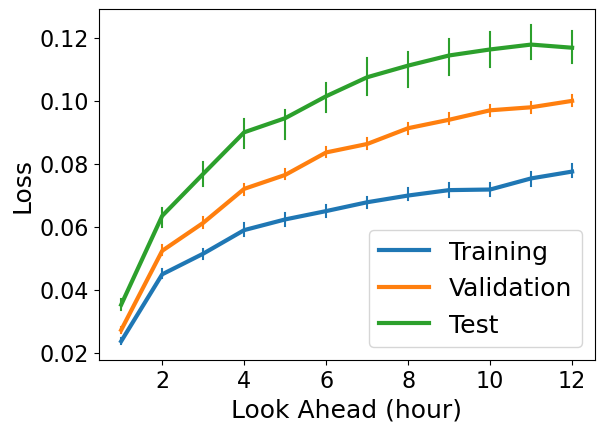

In [18]:
sns.lineplot(data=results_df, x="LOOKAHEAD", y="train_loss", err_style="bars", ci=30, linewidth=3)
sns.lineplot(data=results_df, x="LOOKAHEAD", y="val_loss", err_style="bars", ci=30, linewidth=3)
sns.lineplot(data=results_df, x="LOOKAHEAD", y="test_loss", err_style="bars", ci=30, linewidth=3)
plt.legend(["Training", "Validation", "Test"], fontsize=18)
plt.xlabel("Look Ahead (hour)", fontsize=18)
plt.ylabel("Loss", fontsize=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('figures/Loss_vs_Lookahead.pdf')

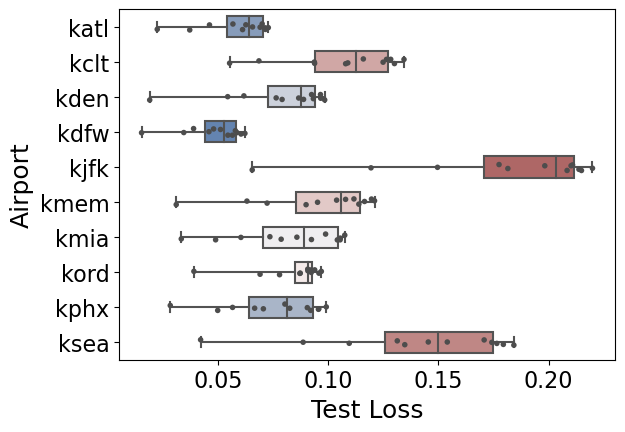

In [19]:

pal = sns.color_palette("vlag", 10)
pal = np.array(pal)
mean_loss = results_df.groupby("AIRPORTS").mean()["test_loss"]
inds = np.argsort(np.argsort(mean_loss))
pal = pal[inds]
sns.boxplot(data=results_df, x="test_loss", y="AIRPORTS", whis=[0, 100], width=.6, palette=pal)
sns.stripplot(data=results_df, x="test_loss", y="AIRPORTS", size=4, color=".3", linewidth=0)
plt.xlabel("Test Loss", fontsize=18)
plt.ylabel("Airport", fontsize=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('figures/Loss_vs_Airport.pdf')

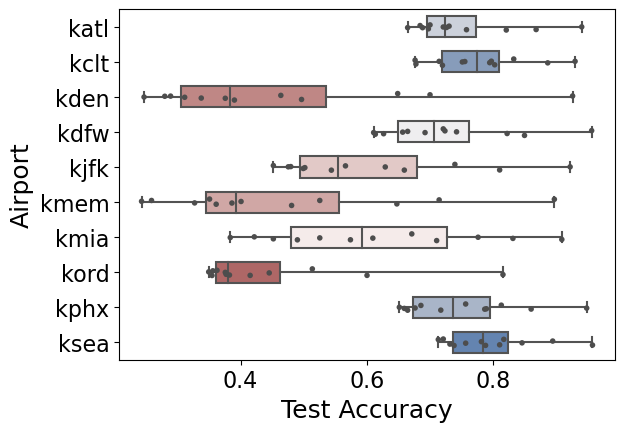

In [20]:
pal = sns.color_palette("vlag", 10)
pal = np.array(pal)
mean_acc = results_df.groupby("AIRPORTS").mean()["test_accuracy"]
inds = np.argsort(np.argsort(-mean_acc))
pal = pal[inds]
sns.boxplot(data=results_df, x="test_accuracy", y="AIRPORTS", whis=[0, 100], width=.6, palette=pal)
sns.stripplot(data=results_df, x="test_accuracy", y="AIRPORTS", size=4, color=".3", linewidth=0)
plt.xlabel("Test Accuracy", fontsize=18)
plt.ylabel("Airport", fontsize=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('figures/Acc_vs_Airport.pdf')

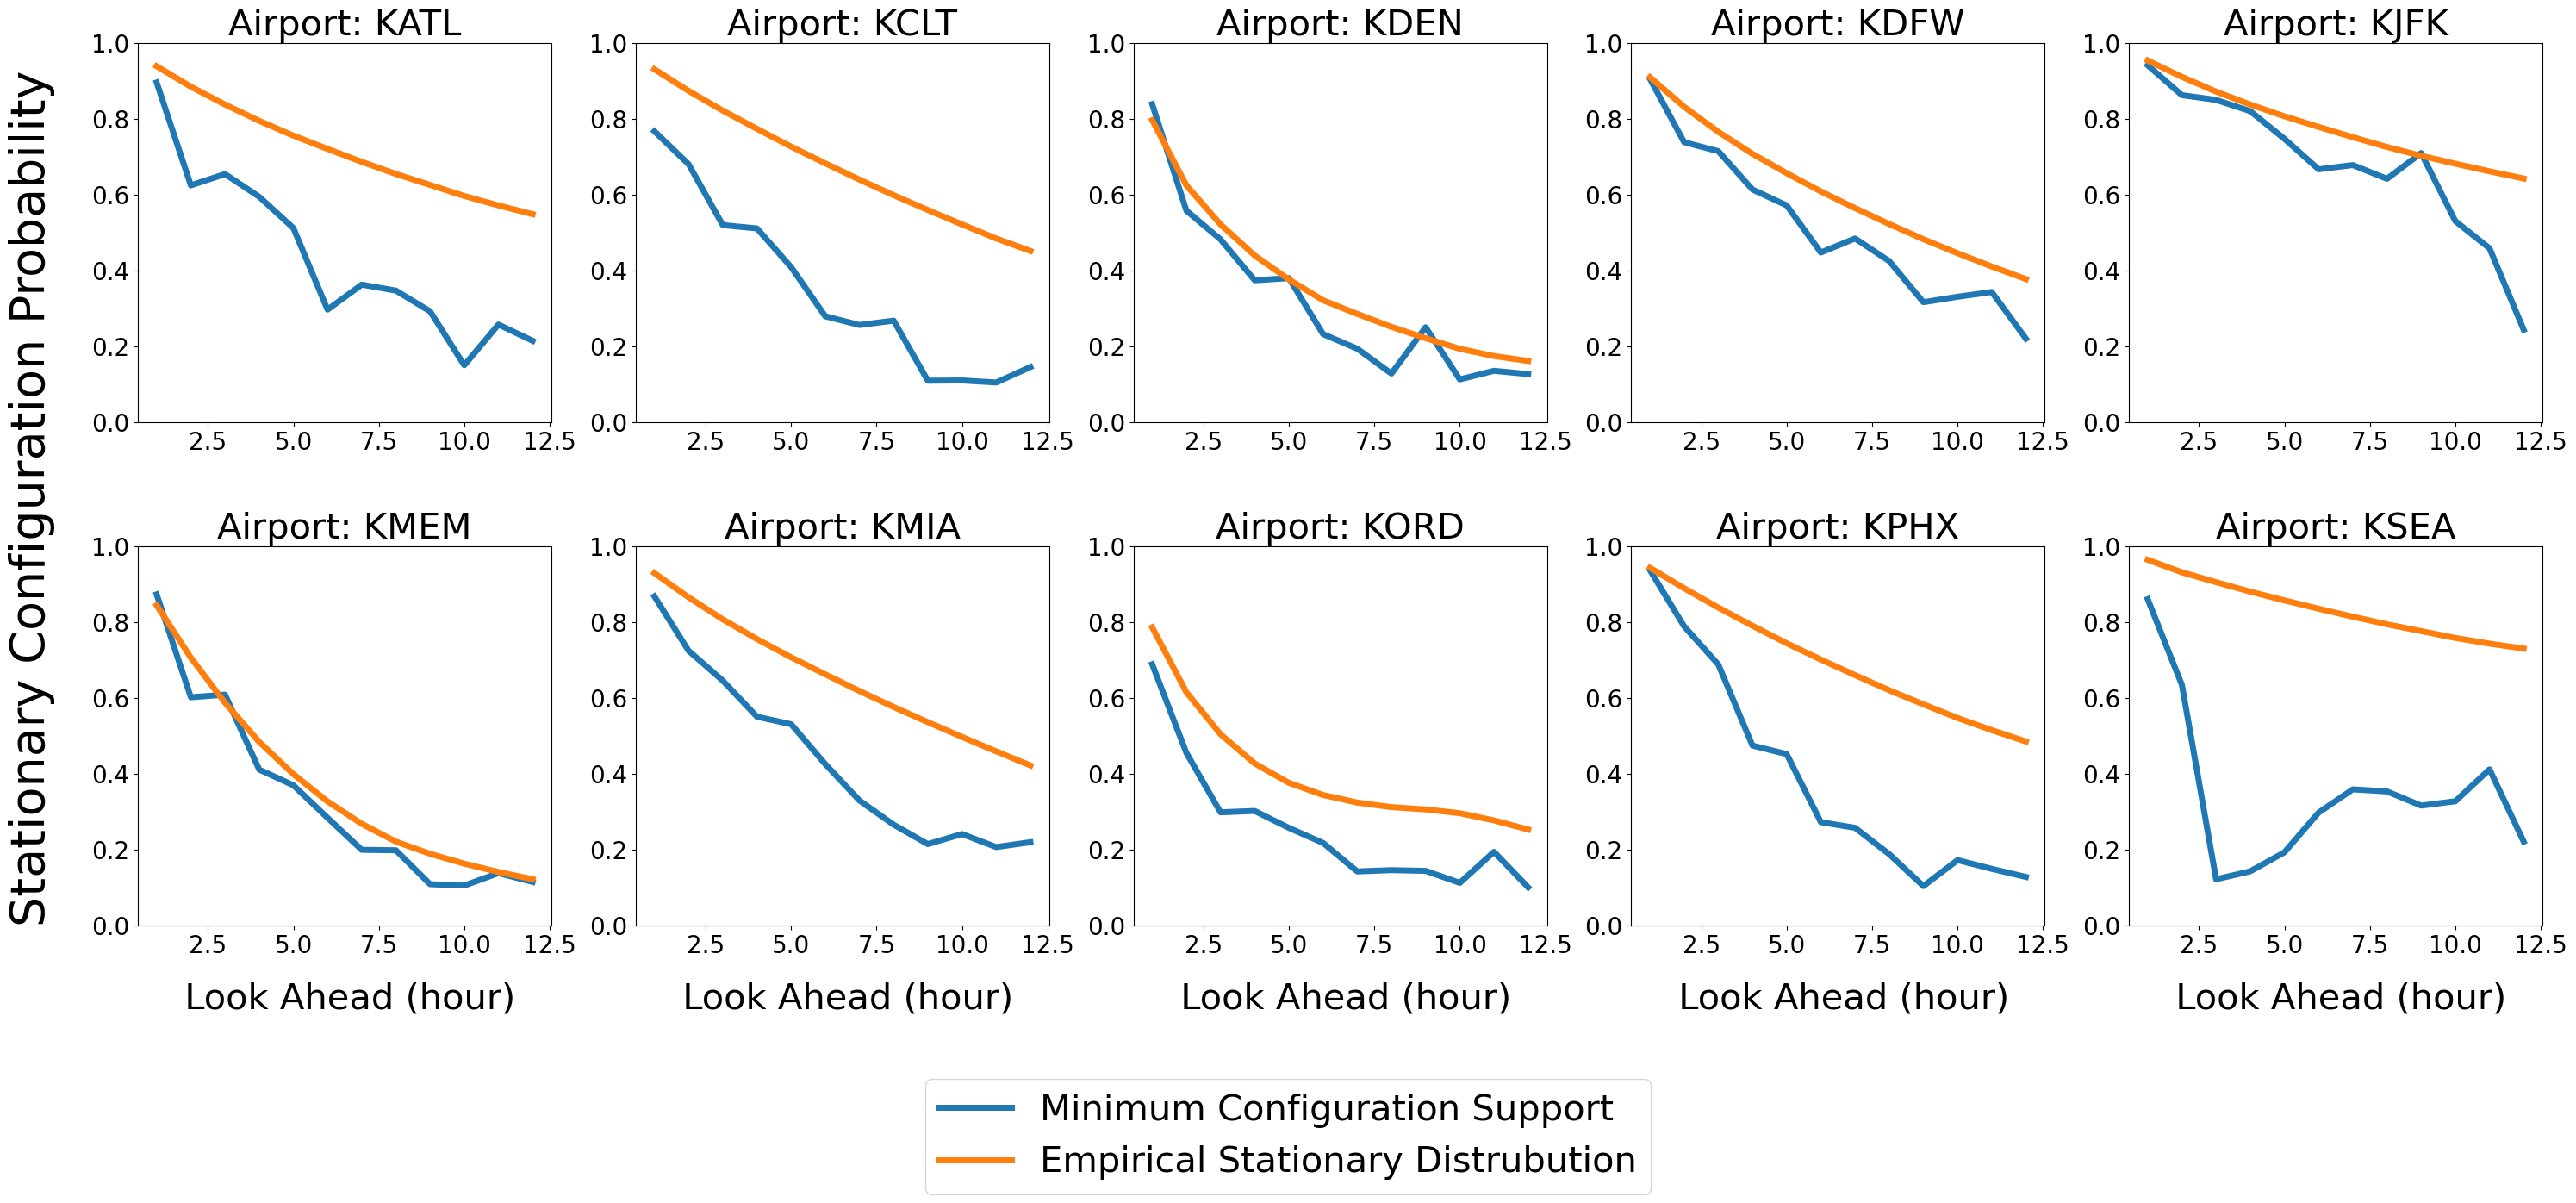

In [21]:
fig, axs = plt.subplots(nrows=2,ncols=5, figsize=(30,12))

AIRPORTS = np.unique(results_df.AIRPORTS)
for i, airport in enumerate(AIRPORTS):
    col_idx  = int(i%5)
    row_idx = int(np.floor(i/5))
    airport_df = results_df[(results_df.AIRPORTS==airport)]

    
    axs[row_idx,col_idx].plot(airport_df.LOOKAHEAD, airport_df.config_support, linewidth=5)

    support_defaults = airport_df.norm_support
    look_aheads = airport_df.LOOKAHEAD

    axs[row_idx,col_idx].plot(look_aheads, support_defaults, linewidth=5)

    if (col_idx == 0) & (row_idx == 0):
        axs[row_idx,col_idx].set_ylabel("Stationary Configuration Probability", fontsize=40)
        axs[row_idx,col_idx].yaxis.set_label_coords(-.2, -0.2)
    if (row_idx == 1):  
        axs[row_idx,col_idx].set_xlabel(" Look Ahead (hour)", fontsize=30)
        axs[row_idx,col_idx].xaxis.set_label_coords(0.5, -0.15)
    
    axs[row_idx,col_idx].set_ylim([0,1])
    axs[row_idx,col_idx].set_title(f"Airport: {airport.upper()}", fontsize=30)
    
    axs[row_idx,col_idx].tick_params(axis='x', labelsize=20)
    axs[row_idx,col_idx].tick_params(axis='y', labelsize=20)
    fig.tight_layout()

lgd = fig.legend(["Minimum Configuration Support", "Empirical Stationary Distrubution"], fontsize=30, loc="upper center", bbox_to_anchor= (0.5,-0.03))
fig.savefig('figures/Dist_vs_AiportLookahead.pdf', bbox_inches='tight')


# Practical Results

/var/folders/yq/cccd6k8570jdry6l6fpch6rw0000gn/T/ipykernel_2416/2192445465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["config_support/stationary_prob"] = results_df.config_support/results_df.norm_support


<AxesSubplot:xlabel='LOOKAHEAD', ylabel='config_support/stationary_prob'>

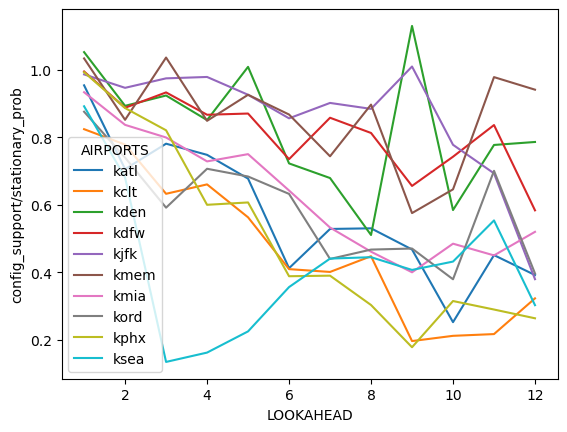

In [22]:
results_df["config_support/stationary_prob"] = results_df.config_support/results_df.norm_support

sns.lineplot(data=results_df,x="LOOKAHEAD",y="config_support/stationary_prob",hue="AIRPORTS")
